In [141]:
!pip install hyperopt -q

In [142]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# %matplotlib widget

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import TimeSeriesSplit

import statsmodels.graphics.tsaplots as sgt
import scipy.stats as stats

from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import cross_validate

from sklearn.svm import SVC
from functools import partial

from sklearn.model_selection import cross_val_score, StratifiedKFold

%matplotlib inline
sns.set_context("talk")

import pickle

# random state
RS = 1
# %matplotlib widget

from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
# from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
# fmin - основная функция, она будет минимизировать наш функционал
# tpe - алгоритм оптимизации
# hp - включает набор методов для объявления пространства поиска гиперпараметров
# trails - используется для логирования результатов

In [143]:
from sklearn.preprocessing import LabelEncoder
# from tensorflow.keras.utils import to_categorical

In [144]:
#В колабе импортируем все необходимые библиотеки
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#Привязываем гуглдиск к колабу
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Загружаем файл в колаб
download = drive.CreateFile({"id": "15gniBcO17lj_aCL7A_QJAyBjq-Ym1piH"})
# https://drive.google.com/file/d/15gniBcO17lj_aCL7A_QJAyBjq-Ym1piH/view?usp=sharing
download.GetContentFile("2024-03-15_16-40-43.emg8")

# Загружаем файл в колаб
download = drive.CreateFile({"id": "1Q38Gt5WeqQP5X8TfoNrn9oYqCmBcKFSD"})
# https://drive.google.com/file/d/1Q38Gt5WeqQP5X8TfoNrn9oYqCmBcKFSD/view?usp=sharing
download.GetContentFile("selection_table")

# # Загружаем файл в колаб
# download = drive.CreateFile({"id": "1vqfALT-qDf9EDKohTZVwNL-Izl_0CAeO"})
# # https://drive.google.com/file/d/1vqfALT-qDf9EDKohTZVwNL-Izl_0CAeO/view?usp=drive_link
# download.GetContentFile("2024-03-04_08-17-49.emg8.protocol")

# # Загружаем файл в колаб
# download = drive.CreateFile({"id": "1jG2kqCtuzo0PCztq0wYj3xtVxV68TB0s"})
# # https://drive.google.com/file/d/1jG2kqCtuzo0PCztq0wYj3xtVxV68TB0s/view?usp=drive_link
# download.GetContentFile("2024-03-04_10-00-21.emg8")

# # Загружаем файл в колаб
# download = drive.CreateFile({"id": "1V75f0C0az94HFErjX9dIfMlI0PN40Mu3"})
# # https://drive.google.com/file/d/1V75f0C0az94HFErjX9dIfMlI0PN40Mu3/view?usp=drive_link
# download.GetContentFile("2024-03-04_10-00-21.emg8.protocol")

# # Загружаем файл в колаб
# download = drive.CreateFile({"id": "1cGM7grbl2n5XWL2nSPrrPmdYCLPEutwW"})
# # https://drive.google.com/file/d/1cGM7grbl2n5XWL2nSPrrPmdYCLPEutwW/view?usp=drive_link
# download.GetContentFile("2024-03-04_11-11-02.emg8")

# # Загружаем файл в колаб
# download = drive.CreateFile({"id": "1XPC8iy-MC9nJZCcaW2kBONTyOO5souwD"})
# # https://drive.google.com/file/d/1XPC8iy-MC9nJZCcaW2kBONTyOO5souwD/view?usp=drive_link
# download.GetContentFile("2024-03-04_11-11-02.emg8.protocol")


# IO utils


# Data

In [145]:
# palm_file = './temp/2024-03-04_08-17-49.emg8'
palm_file = '/content/2024-03-15_16-40-43.emg8'
gestures = pd.read_csv(palm_file, sep=' ', on_bad_lines='warn')
gestures = gestures[~gestures['state'].isin(['Baseline', 'Finish'])]
gestures.sort_index(inplace=True)
gestures = gestures.iloc[1:]
gestures.reset_index(drop=True, inplace=True)

print(gestures.shape)
gestures.head()

(10181, 56)


,ts,td,0,1,2,3,4,5,6,7,...,44,45,46,47,48,49,prot,state,id,now
0,385736.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,Neutral,0,5.05
1,385769.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,Neutral,0,5.08
2,385802.0,33.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,Neutral,0,5.12
3,385835.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,Neutral,0,5.15
4,385868.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,Neutral,0,5.18


In [146]:
gestures['id'].value_counts()

0    5333
2     971
6     970
7     970
8     969
1     968
Name: id, dtype: int64

In [147]:
OMG_CH = np.arange(50).astype(str)
gestures[OMG_CH] = gestures[OMG_CH].astype(float)

In [148]:
# [X features] '0', ..., '49' - каналы OMG датчиков
# 'ts' - метка времени
gestures.columns

Index(['ts', 'td', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46',
       '47', '48', '49', 'prot', 'state', 'id', 'now'],
      dtype='object')

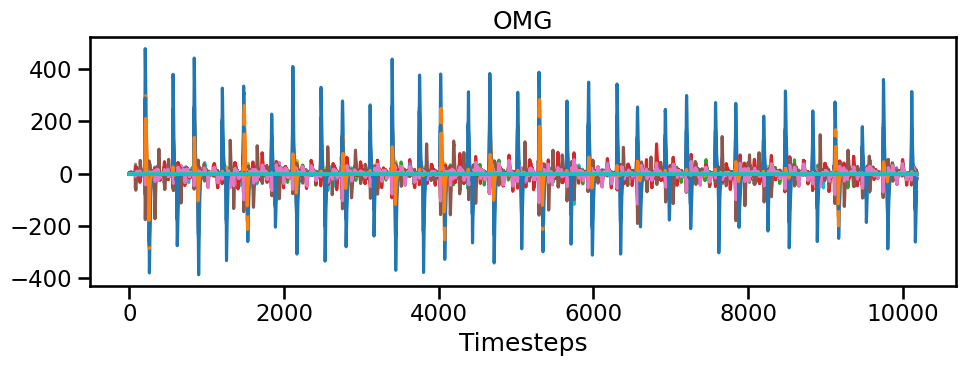

In [149]:
fig = plt.figure(figsize=(10, 4))
plt.plot(gestures[OMG_CH].values)
plt.title('OMG')
plt.xlabel('Timesteps')
plt.tight_layout()

In [150]:
X = gestures[OMG_CH].values

le = LabelEncoder()
state = gestures['state'].values
y_cmd = le.fit_transform(state)

display(np.c_[le.transform(le.classes_), le.classes_])

print(X.shape, y_cmd.shape)

array([[0, 'Close'],
       [1, 'Indication'],
       [2, 'Neutral'],
       [3, 'Open'],
       [4, 'Pinch'],
       [5, 'ThumbFingers']], dtype=object)

(10181, 50) (10181,)


In [151]:
GESTURES = le.classes_
GESTURES

array(['Close', 'Indication', 'Neutral', 'Open', 'Pinch', 'ThumbFingers'],
      dtype=object)

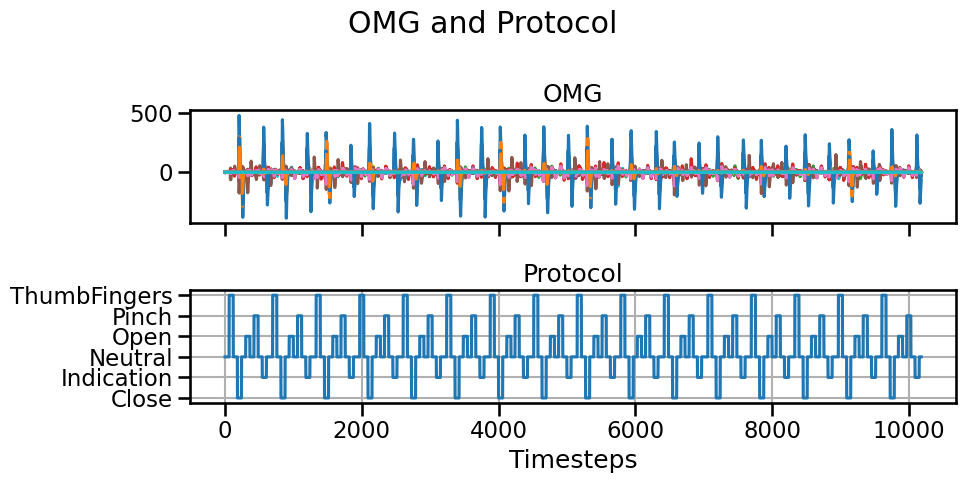

In [152]:
fig, axx = plt.subplots(2, 1, sharex=True, figsize=(10, 5))
plt.sca(axx[0])
plt.plot(gestures[OMG_CH].values)
plt.title('OMG')

plt.sca(axx[1])
plt.plot(y_cmd)
plt.grid()
plt.yticks(np.arange(len(GESTURES)), GESTURES)
plt.xlabel('Timesteps')
plt.title('Protocol')

plt.suptitle('OMG and Protocol')
plt.tight_layout()

## Определение временной задержки целевой переменной.

### Визуализация имеющегося сдвига

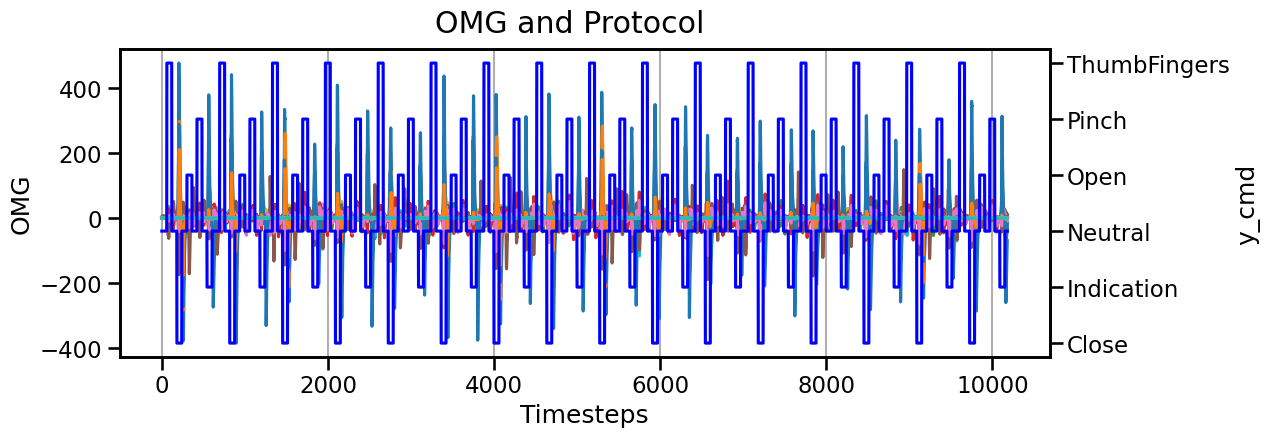

In [153]:
fig, ax1 = plt.subplots(sharex=True, figsize=(12, 4))
plt.suptitle('OMG and Protocol')
ax1.plot(gestures[OMG_CH])
ax1.set_xlabel('Timesteps')
ax1.set_ylabel('OMG')
plt.grid(axis='x')
ax2 = ax1.twinx()
target_df = pd.DataFrame(y_cmd)
ax2.plot(target_df, 'b-')
ax2.set_ylabel('y_cmd')
plt.yticks(np.arange(len(GESTURES)), GESTURES)
plt.show()

In [154]:
def add_feature_derivative(df):
  """Функция для добавления признака производной

    Args:
        df (DataFrame): датасет

    Returns:
        df_log(DataFrame): датасет с добавленным признаком производной
  """
  col_list_base = list(df.columns) #исходный список признаков
  df_temp = df.copy()
  for i in col_list_base:
    col_add = f'der_{i}' #название для нового признака
    df_temp[col_add] = df_temp[i].diff() #создаем признак
    df_temp.fillna(0, inplace = True) #удаляем пустоты
  df_temp.drop(col_list_base, axis = 1 , inplace = True)
  return df_temp

def get_clean_lines(df, treshold = 1.5):
  """Функция для преобразования временного ряда.
  Преобразует все значения выше определенного порога в 1, ниже в 0

    Args:
        df (Series): датасет

    Returns:
        result(DataFrame): преобразованный датасет
  """
  result = np.zeros(df.shape) #создаем массив заполненный нулями размером с датасет
  means = np.mean(df) #выводим среднюю
  for i in range(df.shape[0]): #перебираем значения
    if abs(df[i]) > means*treshold:  #реализуем логику
      result[i] = 1
    else:
      result[i] = 0
  return pd.DataFrame(result)

def shift_definition(df, target):
  """Функция для нахождения временной задержки между командой и её исполнением

    Args:
        df (DataFrame): датасет с показаниями датчиков
        target (DataFrame): данные протокола выполнения команд
    Returns:
        best_shift (int): временной сдвиг
  """
  # рассчитываем производные значений временных датчиков
  gestures_der = add_feature_derivative(df)
  # суммируем модули значений производных
  gestures_der_sum = abs(gestures_der).sum(axis = 1)
  # обнуляем значения ниже порога
  gestures_der_sum_clean = get_clean_lines(gestures_der_sum, treshold = 1.5)

  # преобразуем целевую переменную в DataFrame
  target_df = pd.DataFrame(target)
  # рассчитываем производные значений таргета
  target_der = add_feature_derivative(target_df)
  # преобразуем таргет, если есть жест 1, если нет 0
  for i in range(len(target_der)):
      if (target_der.iloc[i] != 0).bool():
        target_der.iloc[i] = 1

  # объединяем преобразованный таргет и преобрразованную сумму производных в одну таблицу
  data = pd.concat([gestures_der_sum_clean.shift(1), target_der], axis=1).dropna()
  data.columns = ['y_t', 'first_derivative']
  # определяем, при каком сдвиге корреляция  максимальна
  corr_temp = []
  for i in range(1, 40):
    data['y_t'] = data['y_t'].shift(i)
    corr_coef = data.corr()
    corr_temp.append(corr_coef.iloc[1,0])
  l = pd.Series(corr_temp)
  best_shift = l[l == max(corr_temp)]
  return best_shift.index[0]

In [155]:
best_shift = shift_definition(gestures[OMG_CH], y_cmd)
print(best_shift)

30


### Визуализация соответствия команд и показаний от датчиков после сдвига целевой переменной

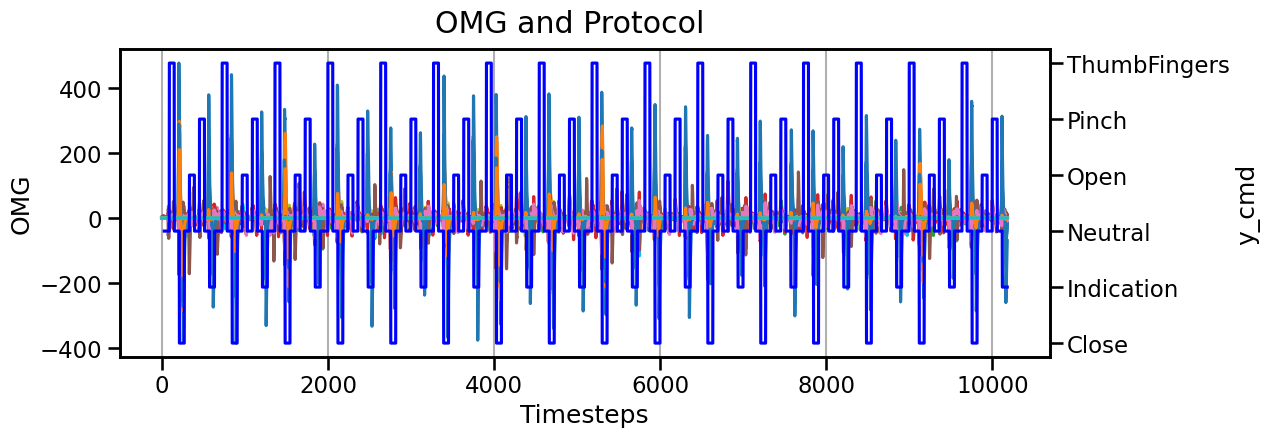

In [156]:
fig, ax1 = plt.subplots(sharex=True, figsize=(12, 4))
plt.suptitle('OMG and Protocol')
ax1.plot(gestures[OMG_CH])
ax1.set_xlabel('Timesteps')
ax1.set_ylabel('OMG')
plt.grid(axis='x')
ax2 = ax1.twinx()
target_df = pd.DataFrame(y_cmd)
ax2.plot(target_df.shift(best_shift), 'b-')
ax2.set_ylabel('y_cmd')
plt.yticks(np.arange(len(GESTURES)), GESTURES)
plt.show()

In [157]:
# сдвигаем значения таргета
target_df = target_df.shift(best_shift).fillna(0)
y_cmd_shift = target_df.to_numpy()
y_cmd_shift

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

## Определение максимального количества лагов

In [158]:
def plot_acf_pacf(series, lags, alpha=0.05):
    """Функция для построения графиков автокорреляции и частичной корреляции(коррелограм)

    Args:
        series (DataFrame, array): стационарный временной ряд
        lags (_type_): количество предыдущих наблюдений для поиска схожести/зависимости
        alpha (float, optional): Доверительный интервал. Defaults to 0.05.
    """

    plt.rcParams["figure.figsize"] = 18, 5 #размеры графика
    fig, axes = plt.subplots(1, 2)
    sgt.plot_acf(series, ax=axes[0], lags=lags, alpha=alpha)#построение графика автокорреляции
    sgt.plot_pacf(series, ax=axes[1], lags=lags, method="ywm", alpha=alpha)#построение графика автокорреляции
    plt.show()

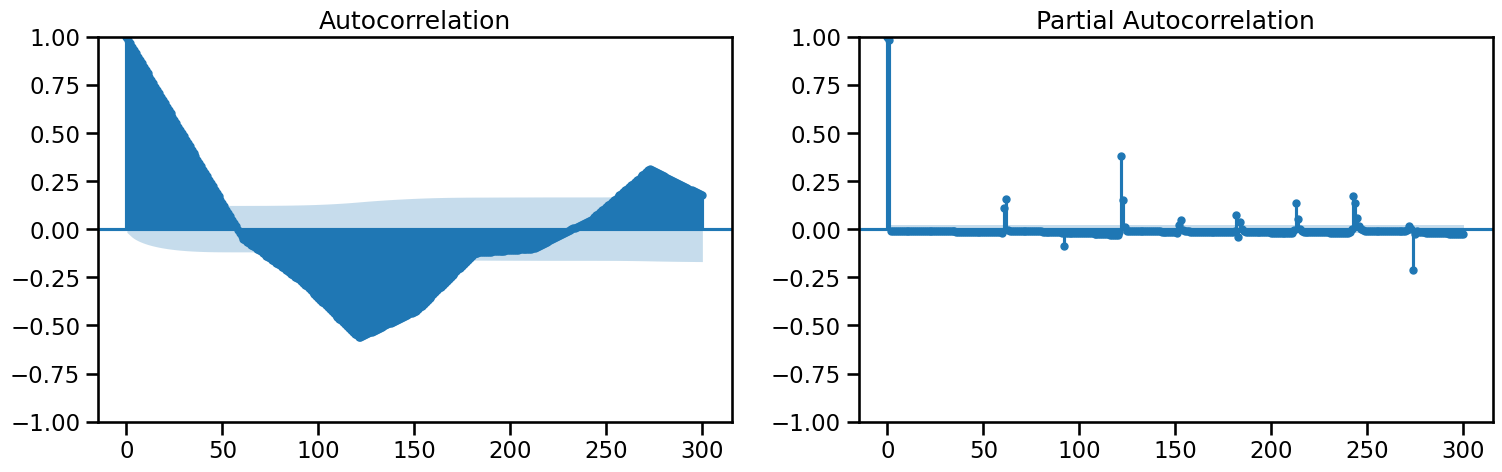

In [159]:
plot_acf_pacf(y_cmd, 300)

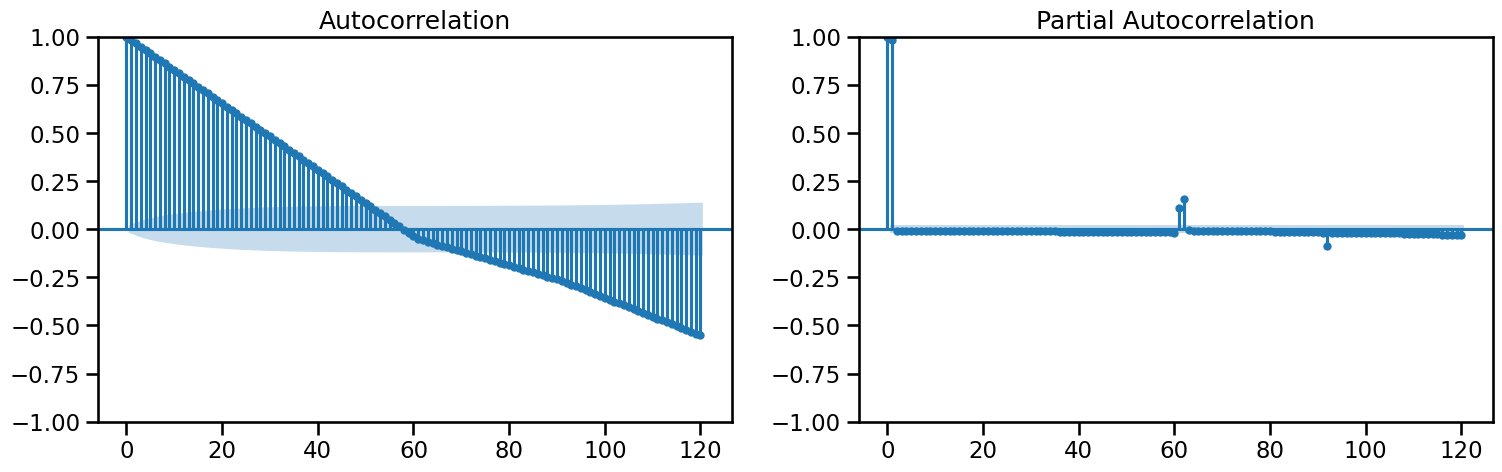

In [160]:
plot_acf_pacf(y_cmd, 120)

Вывод: использовать сдвиг более чем на 60 лагов не имеет смысла, т.к. модель будет обманывать сама себя

# Train/test

### Определение соотношения train/test

In [161]:
target_df.shape

(10181, 1)

<Axes: >

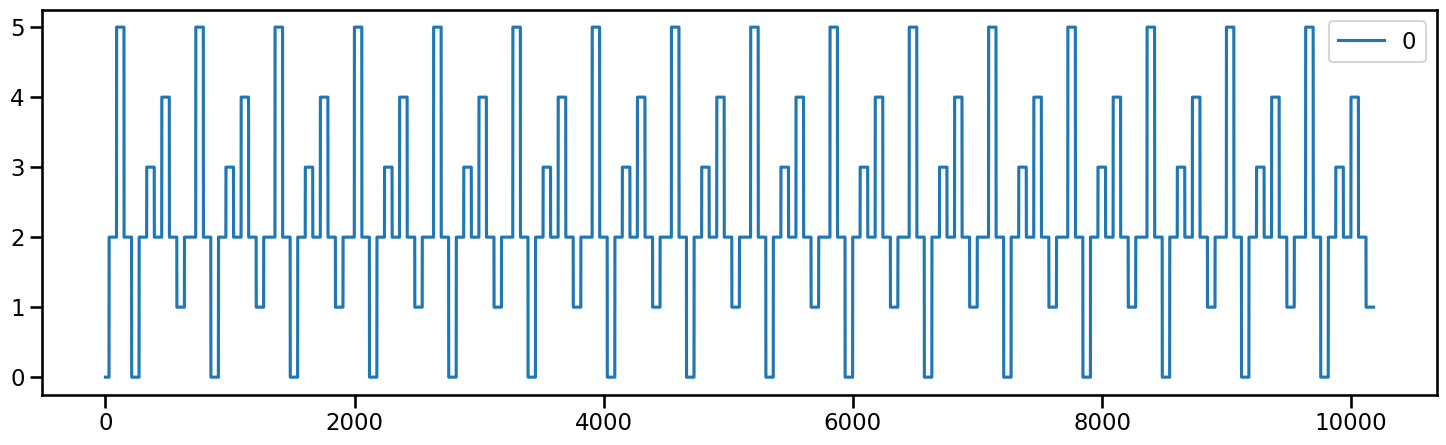

In [162]:
target_df.plot()

Имеем 10181 временных интервалов по 16 жестов.   
Всего 16 циклов жестов.
На каждую серию жестов приходится  636 интервалов
Делить будем 11 серий жестов в train остальное в test
636*11 +30 = 7026

# Preprocessing

## Добавление признака с экспоненциально взвешенными скользящими средними

In [163]:
def add_ewm_feature(df, span=10):
    """
    Функция для добавления столбцов с экспоненциально взвешенными скользящими
    средними (ewm) для каждого признака в DataFrame.

    Args:
        df (DataFrame): Исходный DataFrame
        span (int): Параметр span для расчета ewm (по умолчанию 10)
    Returns:
        DataFrame: DataFrame с добавленными столбцами 'ewm' для каждого признака
    """
    df_temp = df.copy()
    df_col = list(df_temp.columns)
    for col in df_col:
        col_add = f'{col}_ewm' #название для нового признака
        df_temp[col_add] = df_temp[col].ewm(span=span, adjust=False).mean()
    df_temp.drop(df_col, axis = 1, inplace = True)
    df_temp

    return df_temp

## Добавление суммы изменений признака за последние несколько временных шагов.

In [164]:
def add_weight_sum(df, size = 5, win_type = 'triang'):
  """Функция для добавления признака скользящей суммы, c весами значений

    Args:
        df (DataFrame): выборка
        df_col(str): список признаков из общей выборки для обработки
        size(int): размер окна
        metod(str): веса. Действительная оконная функция scipy.signal

    Returns:
        df_log(DataFrame): датасет с добавленным признаком скользящей суммы, c весами значений
  """
  df_temp = df.copy()
  df_col = list(df_temp.columns)
  for i in df_col:
    col_add = f'add_{size}_{i}' #название для нового признака
    df_temp[col_add] = round(df_temp[i].rolling(window = size).sum()) #создаем признак , win_type = win_type
    df_temp.fillna(0, inplace = True) #удаляем нули
  df_temp.drop(df_col, axis = 1, inplace = True)
  df_temp

  return df_temp

## Добавление лагов

In [165]:
def add_lag(df, step = 3, lag_n = 7):
  """Функция для добавления временных лагов в выборку с шагом

    Args:
        df (DataFrame): выборка
        lag_n(int): количество временных лагов
        step(int): шаг сдвига по признакам

    Returns:
        df_temp(DataFrame): датасет с добавленными временными лагами, пропуски заполнены 0
  """

  df_temp = df.copy() #coздаем новый датасет для добавления новых признаков
  df_col = list(df_temp.columns) #исходный список признаков
  col_step = [] #список признаков с шагом
  for i in range(0, len(df_col), step): #перебираем признаки
    col_step.append(df_col[i]) #формируем список признаков с шагом
  for _, col in enumerate(col_step): #перебираем список признаков с шагом
    for n, v in enumerate(range(1,lag_n)): #перебираем лаги
      col_lag = f'{col}_lag_{v}' #название для нового признака
      df_temp[col_lag] = df_temp.loc[:, col].shift(v, fill_value = 0) #создаем новый признак
  df_temp.drop(df_col, axis = 1, inplace = True)

  return df_temp

# Baseline на случайных параметрах препроцессинга.

In [166]:
data_n = gestures[OMG_CH]
# Добавление признака с экспоненциально взвешенными скользящими средними
data_add_ewm = add_ewm_feature(data_n, span=10)
# Добавление суммы изменений признака за последние несколько временных шагов.
data_weight_sum = add_weight_sum(data_n, size = 5, win_type = 'triang')
# Добавление лагов
data_add_lag = add_lag(data_n, step = 2, lag_n = 6) #выполняем функцию сдвига признаков с лагом
# объединение преобразований
df = pd.concat([data_n, data_add_ewm, data_weight_sum, data_add_lag], axis=1)
std_1 = StandardScaler()
X = std_1.fit_transform(df)
X_train = X[:7026]
X_test = X[7026:]

y_train = y_cmd_shift[:7026]
y_test = y_cmd_shift[7026:]

classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=np.ravel(y_train))
class_weights = dict(zip(classes, weights))

model = SVC(class_weight = class_weights, break_ties=True, decision_function_shape='ovr', max_iter = -1)
y_train = y_train.ravel()
model.fit(
    X=X_train,
    y=y_train
)

# сделаем предсказание на обучающей выборке
# y_pred = model.predict(X_train)
y_pred_test = model.predict(X_test)

f1 = f1_score(y_test, y_pred_test, average= 'weighted')
print(f1)

0.8244182157750047


# Подбор параметров препроцессинга

In [167]:
# selection_table = pd.DataFrame(columns = ['span', 'roll_size', 'win_type', 'step', 'lag_n', 'f1'])
# list_win_type = ['boxcar', 'triang']
# indx = 0
# for i in range(1,100,15):
#   for i1 in range(2,10,3):
#     for i2 in list_win_type:
#       for i3 in range(1,30,5):
#         for i4 in range(1,20,5):
#           data_n = gestures[OMG_CH]
#           # Добавление признака с экспоненциально взвешенными скользящими средними
#           data_add_ewm = add_ewm_feature(data_n, span=i)
#           # Добавление суммы изменений признака за последние несколько временных шагов.
#           data_weight_sum = add_weight_sum(data_n, size = i1, win_type = i2)
#           # Добавление лагов
#           data_add_lag = add_lag(data_n, step = i3, lag_n = 3) #выполняем функцию сдвига признаков с лагом
#           # объединение преобразований
#           df = pd.concat([data_n, data_add_ewm, data_weight_sum, data_add_lag], axis=1)
#           # df = pd.concat([data_n, data_add_ewm, data_weight_sum], axis=1)
#           std_1 = StandardScaler()
#           X = std_1.fit_transform(df)
#           X_train = X[:7026]
#           X_test = X[7026:]

#           y_train = y_cmd_shift[:7026]
#           y_test = y_cmd_shift[7026:]

#           classes = np.unique(y_train)
#           weights = compute_class_weight(class_weight='balanced', classes=classes, y=np.ravel(y_train))
#           class_weights = dict(zip(classes, weights))

#           model = SVC(class_weight = class_weights, break_ties=True, decision_function_shape='ovr', max_iter = -1)
#           y_train = y_train.ravel()
#           model.fit(
#               X=X_train,
#               y=y_train
#           )

#           # сделаем предсказание на обучающей выборке
#           # y_pred = model.predict(X_train)
#           y_pred_test = model.predict(X_test)

#           f1 = f1_score(y_test, y_pred_test, average= 'weighted')
#           # print(i,' ',i1, ' ', i2, ' ', f1)

#           selection_table.loc[indx, 'span'] = int(i)
#           selection_table.loc[indx, 'roll_size'] = int(i1)
#           selection_table.loc[indx, 'win_type'] = str(i2)
#           selection_table.loc[indx, 'step'] = int(i3)
#           selection_table.loc[indx, 'lag_n'] = int(i4)
#           selection_table.loc[indx, 'f1'] = float(f1)
#           # print(selection_table.iloc[[indx]])
#           indx +=1
# # ['span', 'roll_size', 'win_type', 'step', 'lag_n', 'f1']

# import pickle
# with open('selection_table', 'wb') as fp:
#     pickle.dump(selection_table, fp)
# # Скачивание из colab на локальный компьютер
# from google.colab import files
# files.download('selection_table')



In [168]:
# Десериализация
with open ('selection_table', 'rb') as fp:
    selection_table = pickle.load(fp)

In [169]:
s_table = selection_table.sort_values (by = ['f1'], ascending = False ).reset_index(drop = True)

In [170]:
s_table.set_index(['f1'], inplace =True)

In [171]:
s_table.head(5)

,span,roll_size,win_type,step,lag_n
f1,,,,,
0.901632,46,8,boxcar,21,6
0.901632,46,8,boxcar,21,11
0.901632,46,8,boxcar,21,1
0.901632,46,8,boxcar,21,16
0.901632,46,8,triang,21,16


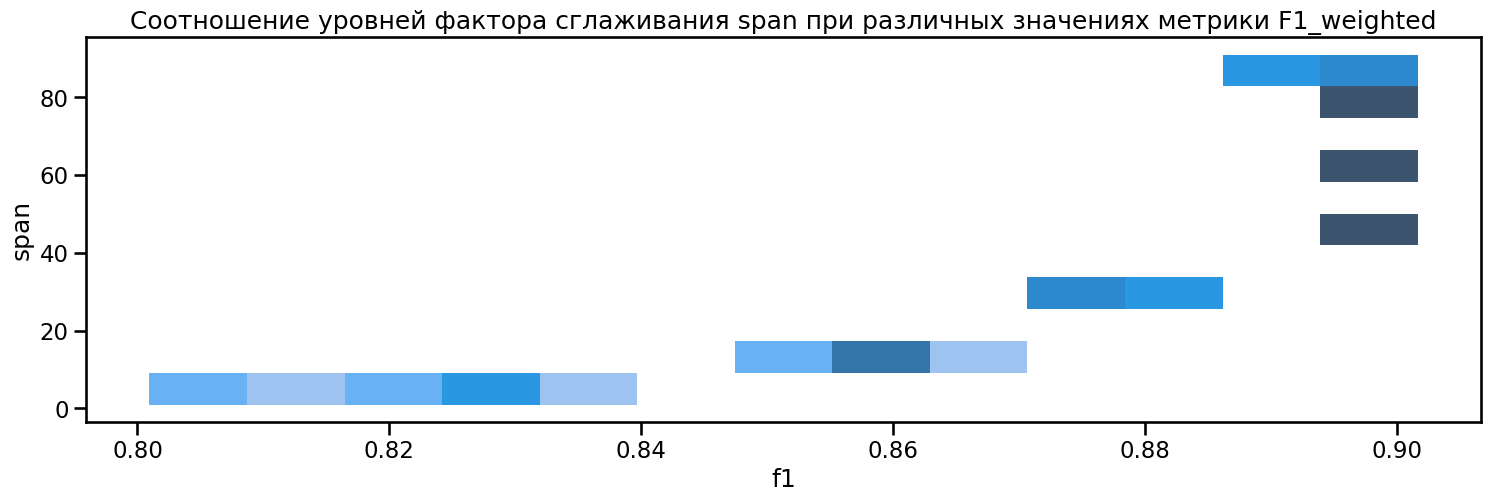

In [192]:
sns.histplot(data=selection_table, x="f1", y="span")
# Добавляем название к графику
plt.title('Соотношение уровней фактора сглаживания span при различных значениях метрики F1_weighted')
plt.show();

На графике видна зависимость высоких показателей метрики и высокого уровня фактора сглаживания в методе экспоненциального скользящего среднего

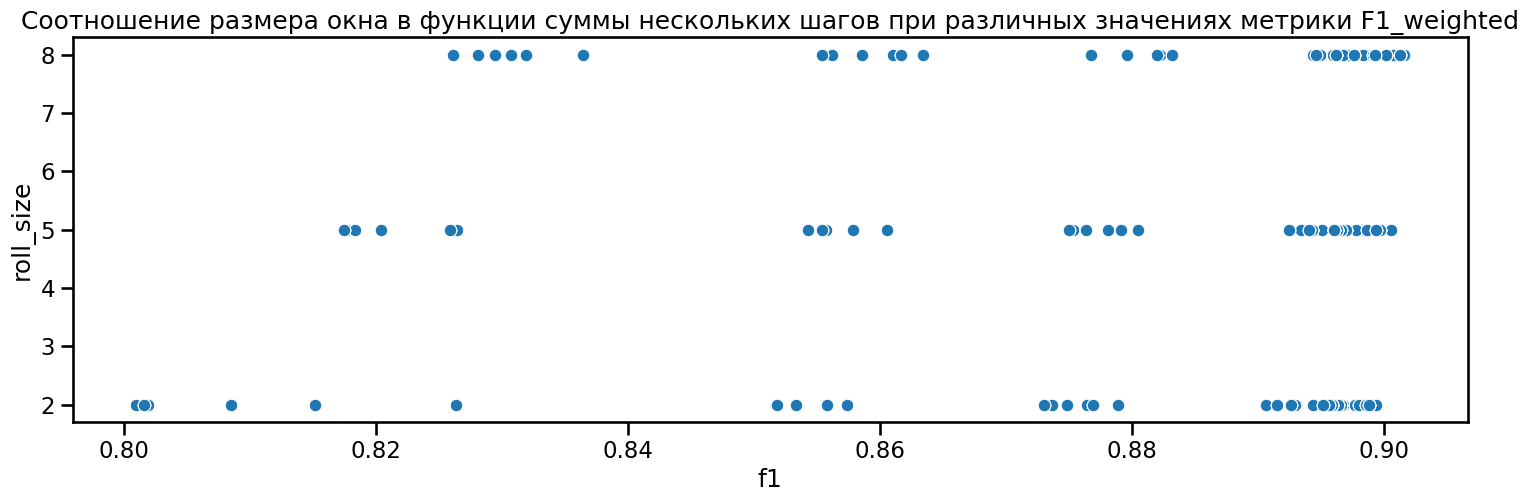

In [196]:
sns.scatterplot(data=selection_table, x="f1", y="roll_size")
plt.title('Соотношение размера окна в функции суммы нескольких шагов при различных значениях метрики F1_weighted')
plt.show();

В данном примере не отмечено какой-либо зависимости  размера окна на метрику f1_weighted

In [174]:
s_table[s_table.index >=0.9]['win_type'].value_counts()

boxcar    32
triang    32
Name: win_type, dtype: int64

Параметр способа придания весов в зависимости от удаленности не влияет на предсказание временного ряда

In [175]:
s_table.iloc[[0]]

,span,roll_size,win_type,step,lag_n
f1,,,,,
0.901632,46,8,boxcar,21,6


# Обучим модель на подобранных параметрах препроцессинга.

In [176]:
data_n = gestures[OMG_CH]
# Добавление признака с экспоненциально взвешенными скользящими средними
data_add_ewm = add_ewm_feature(data_n, span=46)
# Добавление суммы изменений признака за последние несколько временных шагов.
data_weight_sum = add_weight_sum(data_n, size = 8, win_type = 'boxcar')
# Добавление лагов
data_add_lag = add_lag(data_n, step = 21, lag_n = 6) #выполняем функцию сдвига признаков с лагом
# объединение преобразований
df = pd.concat([data_n, data_add_ewm, data_weight_sum, data_add_lag], axis=1)
# df = pd.concat([data_n, data_add_ewm, data_weight_sum], axis=1)
std_1 = StandardScaler()
X = std_1.fit_transform(df)
X_train = X[:7026]
X_test = X[7026:]

y_train = y_cmd_shift[:7026]
y_test = y_cmd_shift[7026:]

classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=np.ravel(y_train))
class_weights = dict(zip(classes, weights))

p_model = SVC(class_weight = class_weights, break_ties=True, decision_function_shape='ovr', max_iter = -1)
y_train = y_train.ravel()
model.fit(
    X=X_train,
    y=y_train
)

# сделаем предсказание на обучающей выборке
# y_pred = model.predict(X_train)
y_pred_test = model.predict(X_test)

f1 = f1_score(y_test, y_pred_test, average= 'weighted')
print(f1)

0.9010570249804997


Метрика улучшилась

In [177]:
# X_train = X[:7026]
# X_test = X[7026:]

# y_train = y_cmd_shift[:7026]
# y_test = y_cmd_shift[7026:]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7026, 165) (7026,)
(3155, 165) (3155, 1)


# Modeling

# Metrics

In [125]:
# сделаем предсказание на обучающей выборке
y_pred = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [126]:
# определим метрики
report = classification_report(y_train, y_pred)
print("Classification Report:\n", report)

# определим метрики
# f1 = f1_score(y_train, y_pred_h, average='micro')
# print("mean f_score:\n", f1)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       696
         1.0       0.99      1.00      0.99       666
         2.0       0.99      0.98      0.99      3663
         3.0       0.98      1.00      0.99       667
         4.0       0.98      1.00      0.99       667
         5.0       0.95      1.00      0.98       667

    accuracy                           0.99      7026
   macro avg       0.98      0.99      0.99      7026
weighted avg       0.99      0.99      0.99      7026



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

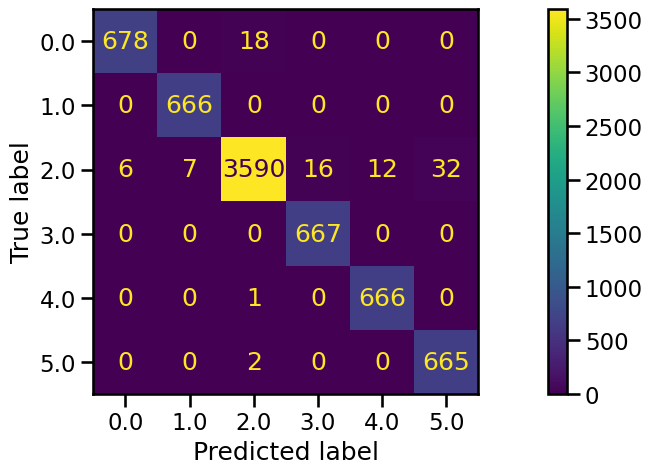

In [127]:
#confusion matrix
confusion_mtx = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mtx, display_labels=model.classes_)
disp.plot();

In [ ]:
GESTURES

array(['Close', 'Indication', 'Neutral', 'Open', 'Pinch', 'ThumbFingers'],
      dtype=object)

### Test

              precision    recall  f1-score   support

       Close       0.87      0.66      0.75       302
  Indication       0.69      0.91      0.79       303
     Neutral       0.97      0.91      0.94      1640
        Open       0.81      0.98      0.89       304
       Pinch       0.92      0.99      0.95       303
ThumbFingers       0.94      0.92      0.93       303

    accuracy                           0.90      3155
   macro avg       0.87      0.89      0.87      3155
weighted avg       0.91      0.90      0.90      3155



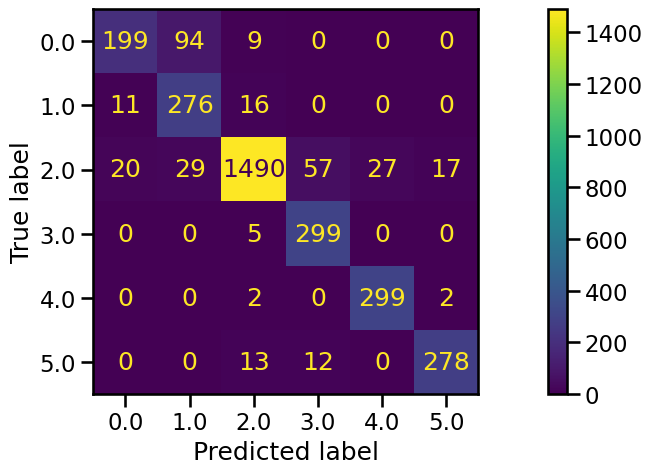

In [179]:
print(classification_report(y_test, y_pred_test, target_names=GESTURES))

#confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mtx, display_labels=model.classes_)
disp.plot()

При подборе гиперпараметров модель переобучается и показывает худший результат, будем использовать настройки по умолчанию для классификаторов.

# Real-time inference

In [ ]:
# ! pip install serial -q

In [134]:
import time
# import serial
# from IPython.display import clear_output

## Inference Utils: Put your code here

In [ ]:
# import MotoricaInterface as mi; assert(mi.__version__=="0.0.3") # last time tested
# vp = mi.VirtualPhantomClient('localhost', 1755)

In [185]:
def preprocessing(data, n_lags = 10):
  if len(data) < n_lags:
    # print(0)
    return np.zeros(165)
  else:
    data_n = pd.DataFrame(data).fillna(0.0)
    # Добавление признака с экспоненциально взвешенными скользящими средними
    data_add_ewm = add_ewm_feature(data_n, span=46)
    # Добавление суммы изменений признака за последние несколько временных шагов.
    data_weight_sum = add_weight_sum(data_n, size = 8, win_type = 'boxcar')
    # Добавление лагов
    data_add_lag = add_lag(data_n, step = 21, lag_n = 6) #выполняем функцию сдвига признаков с лагом
    # объединение преобразований
    df = np.concatenate([data_n, data_add_ewm, data_weight_sum, data_add_lag], axis=1)
    return df[-1]

def inference(x):

    y = model.predict(x)
    return y[-1]

def postprocessing(x, prev):
    if prev is None:
        y = x
    else:
        y = x*0.1 + prev*0.9 # Holt-Winters filter
    return x

def commands(x):
    cmd = vp.neutral_state.copy()
    # for this mapping look at GESTURES
    if x == 0: # 'Close'
        cmd.update({'thumb_flex': 1, 'index_flex': 1, 'middle_flex': 1, 'ring_flex': 1, 'pinky_flex': 1})
        return cmd
    elif x == 1: # 'Indication'
        cmd.update({'thumb_extend':1, 'index_extend': 1, 'middle_flex': 1, 'ring_flex': 1, 'pinky_flex': 1})
        return cmd
    elif x == 2: # 'Neutral'
        pass
        return cmd
    elif x == 3: # 'Open'
        cmd.update({'thumb_extend': 1, 'index_extend': 1, 'middle_extend': 1, 'ring_extend': 1, 'pinky_extend': 1})
        return cmd
    elif x == 4: # 'Pinch'
        cmd.update({'thumb_flex':1, 'index_flex': 1, 'middle_extend': 1, 'ring_extend': 1, 'pinky_extend': 1})
        return cmd
    elif x == 5: # 'ThumbFingers'
        cmd.update({'thumb_flex': 1, 'index_extend': 1, 'middle_extend': 1, 'ring_extend': 1, 'pinky_extend': 1})
        return cmd
    else:
        return cmd

In [181]:
GESTURES

array(['Close', 'Indication', 'Neutral', 'Open', 'Pinch', 'ThumbFingers'],
      dtype=object)

## Inference

### Offline (dataset)

In [182]:
df_temp = gestures.iloc[:, :52]
df_columns = df_temp.columns
df = StandardScaler().fit_transform(df_temp)
df_sim = pd.DataFrame(df, columns = df_columns)
print(df_sim.shape)

(10181, 52)


In [183]:
df_sim

,ts,td,0,1,2,3,4,5,6,7,...,40,41,42,43,44,45,46,47,48,49
0,-1.731881,0.0,-0.000830,-0.001503,-0.009116,0.0,0.0,0.0,0.0,0.0,...,-0.001709,-0.003987,-0.009271,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.731540,0.0,-0.000830,-0.001503,-0.009116,0.0,0.0,0.0,0.0,0.0,...,-0.001709,-0.003987,-0.009271,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.731200,0.0,0.024882,0.048833,-0.009116,0.0,0.0,0.0,0.0,0.0,...,-0.001709,-0.003987,-0.009271,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.730860,0.0,-0.000830,-0.001503,-0.009116,0.0,0.0,0.0,0.0,0.0,...,-0.001709,-0.003987,-0.009271,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.730520,0.0,-0.000830,-0.001503,-0.009116,0.0,0.0,0.0,0.0,0.0,...,-0.001709,-0.003987,-0.009271,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10176,1.730520,0.0,-1.337842,-0.555196,-0.009116,0.0,0.0,0.0,0.0,0.0,...,-0.734027,-0.062988,-0.009271,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10177,1.730860,0.0,-1.209283,-0.530028,-0.009116,0.0,0.0,0.0,0.0,0.0,...,-0.658270,-0.062988,-0.009271,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10178,1.731200,0.0,-1.106436,-0.479693,-0.009116,0.0,0.0,0.0,0.0,0.0,...,-0.582513,-0.062988,-0.009271,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10179,1.731540,0.0,-1.003589,-0.504860,-0.009116,0.0,0.0,0.0,0.0,0.0,...,-0.532008,-0.062988,-0.009271,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [186]:
TIMEOUT = 0.033
DEBUG = False

i = 0
ts_old = time.time()
ts_diff = 0;
ts_diff_list = []
n_lags = 10

y_previous = None
y_dct = {
    'omg_sample':[],
    'sample_preprocessed':[],

    'y_predicted':[],
    'y_postprocessed':[],
    # 'y_commands':[],
}
while True:

    # [Data reading]
    ts_start = time.time()

    try:
        # [Sim data]
        if i < len(df_sim):
            sample = df_sim.values[i]
        else:
            break
        # [/Sim data]
        [[ts, cycle_ts], omg_sample] = np.array_split(sample, [2])

    except Exception as e:
        print(e)

    # [Data preprocessing]
    # print(omg_sample.shape)
    sample_preprocessed  = preprocessing(y_dct['omg_sample'][-n_lags:], n_lags)
    # [/Data preprocessing]
    y_dct['sample_preprocessed'].append(sample_preprocessed)

    # [Inference]
    y_predicted        = inference(y_dct['sample_preprocessed'][-n_lags:])
    # [/Inference]

    # [Inference Postprocessing]
    y_postprocessed     = postprocessing(y_predicted, y_previous)
    # [/Inference Postprocessing]

    # [Commands composition]
    # y_commands          = commands(y_postprocessed.argmax())
    # [/Commands composition]

    # [Commands sending]
    # NO COMMANDS SENDING IN SIMULATION
    # [/Commands sending]

    # [Data logging]
    y_dct['omg_sample'].append(omg_sample)
    # y_dct['sample_preprocessed'].append(sample_preprocessed)
    y_dct['y_predicted'].append(y_predicted)
    y_dct['y_postprocessed'].append(y_postprocessed)
    # y_dct['y_commands'].append(y_commands)
    # [/Data logging]

    y_previous = y_postprocessed

    if DEBUG:
        clear_output(wait=True)

        # sanity check: Sizes of SAMPLE=52, OMG=50
        print(f'SAMPLE SIZE: {len(sample)}, OMG: {len(omg_sample)}')
        # print('INPUT:\n', s)
        print('SAMPLE:\n', sample)

        # sanity check: Sizes of SAMPLE=65, OMG=50
        print(f'SAMPLE SIZE: {len(sample)}, OMG: {len(omg_sample)}')
        print(f'TS: {ts}, CYCLE TS: {cycle_ts}')
        print(y_postprocessed)
        # print(y_commands)

    ts_diff = time.time() - ts_start
    ts_diff_list.append(ts_diff)
    # assert(ts_diff<TIMEOUT), 'Calculation cycle takes more than TIMEOUT, halting...'
    ts_old = ts_start
    i += 1
print(round(np.array(ts_diff_list).max(),3))

0.863


In [190]:
for key, val in y_dct.items():
    # print(f"len({key}) = {len(y_dct[key])}")
    y_dct[key] = np.stack(val)
    print(f"{key}.shape = {y_dct[key].shape}")

omg_sample.shape = (10181, 50)
sample_preprocessed.shape = (10181, 165)
y_predicted.shape = (10181,)
y_postprocessed.shape = (10181,)


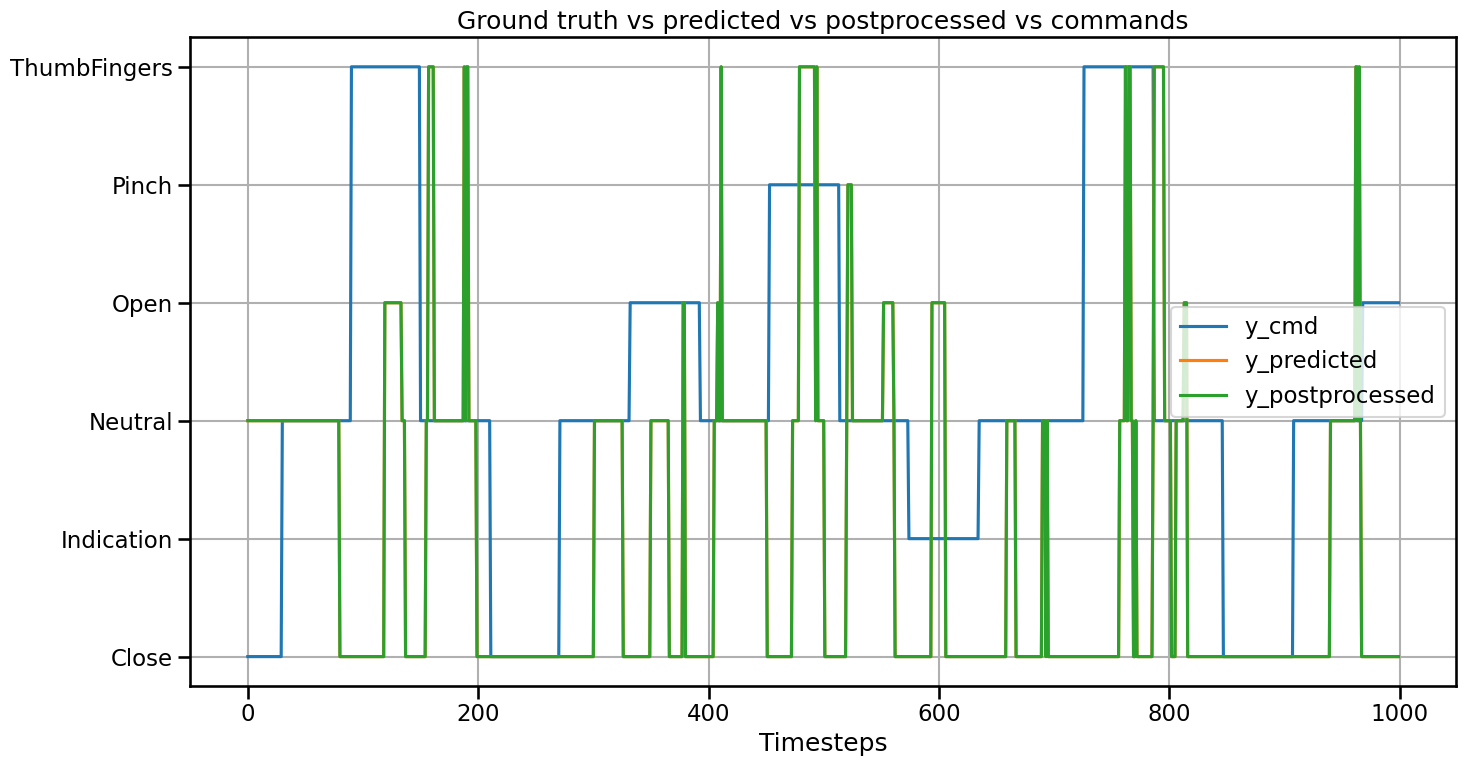

In [191]:
fig = plt.figure(figsize=(15, 8))

plt.plot(y_cmd_shift[:1000], c='C0', label='y_cmd')

# plt.plot(y_dct['y_predicted'].argmax(axis=1), c='C1', label='y_predicted')
# plt.plot(y_dct['y_postprocessed'].argmax(axis=1), c='C2', label='y_postprocessed')

plt.plot(y_dct['y_predicted'][:1000], c='C1', label='y_predicted')
plt.plot(y_dct['y_postprocessed'][:1000], c='C2', label='y_postprocessed')

plt.title('Ground truth vs predicted vs postprocessed vs commands')
plt.yticks(np.arange(len(GESTURES)), GESTURES)
plt.legend()
plt.grid()
plt.xlabel('Timesteps')

plt.tight_layout()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_cmd, y_dct['y_predicted'], target_names=GESTURES))

### Online (prosthesis or virtual hand)

In [ ]:
from copy import deepcopy
import MotoricaInterface as mi; assert(mi.__version__=="0.0.3") # last time tested
vp = mi.VirtualPhantomClient('localhost', 1755)

In [ ]:
!ls /dev/ttyUSB*

In [ ]:
TIMEOUT = 0.033
DEBUG = True

ser = None
ser_port = None
ser_port = '/dev/ttyUSB0'

if ser_port is not None:
    ser = serial.Serial(port=ser_port, baudrate=115200, timeout=1.0)
    # time.sleep(0.2)

    # ser.write('M0\r\n'.encode())
    # time.sleep(0.1)

    # # ser.write('S2\r\n'.encode())
    # # time.sleep(0.1)

    # ser.write('PT\r\n'.encode())
    # time.sleep(0.1)
    # ser.write('Pt\r\n'.encode())
    # time.sleep(0.1)
    # ser.flush()

    # time.sleep(0.1)

In [ ]:
def parseline():
    line = ser.readline().decode().replace('\n', '')
    data = np.array(list(filter(len, np.array(line.split(" "))))).astype(float)
    return data

ser.readline()
while True:
    data = parseline()
    print(f"data len: {len(data)} |", list(data), end = '                                          \r')

In [ ]:
# flush buffers
ser.reset_input_buffer()
ser.read()

i = 0;
while(ser.in_waiting):
    print(f'Flushing buffers {i}: {ser.in_waiting}', end='    \r')
    ser.read_all()
    time.sleep(0.005)
    i+=1;
ser.readline()
ser.readline()

i = 0
ts_old = time.time()
ts_diff = 0;
n_lags = 10
y_dct = {
    'omg_sample':[],
    'sample_preprocessed':[],

    'y_predicted':[],
    'y_postprocessed':[],
    # 'y_commands':[],
}

ts_diffs = []
x_previous = None
y_previous = None

pack = None

prev_state = 'None'
prev_idx = -1
y_commands = vp.neutral_state.copy()

while True:

    # [Data reading]
    s = ser.readline()
    ts_start = time.time()

    try:
        sample = s.decode().replace('\n', '')
        data = np.array(list(filter(len, np.array(sample.split(" "))))).astype(float)
        [[ts, cycle_ts], omg_sample] = np.array_split(data, [2])

    except Exception as e:
        print(e)
    # [/Data Reading]

    # [Data preprocessing]
    sample_preprocessed  = preprocessing(y_dct['omg_sample'][-n_lags:], n_lags)
    sample_preprocessed  = std_1.transform(sample_preprocessed[:150].reshape(1,-1))[0]
    # [/Data preprocessing]
    y_dct['sample_preprocessed'].append(sample_preprocessed[:150])

    # [Inference]
    y_predicted        = inference(y_dct['sample_preprocessed'][-n_lags:])
    # [/Inference]

    # [Inference Postprocessing]
    y_postprocessed     = postprocessing(y_predicted, y_previous)
    # [/Inference Postprocessing]

    # [Commands composition]
    y_commands          = commands(int(y_postprocessed))
    # [/Commands composition]

    y_dct['omg_sample'].append(omg_sample)

    # [Commands sending]
    # pack, _ = drv_abs_one(ser, list(y_commands)); # + [0]
    prot_idx = deepcopy(y_commands)
    if (prot_idx!=prev_idx):
        # socket_send(row.Command)
        vp.send_cmd(**y_commands)
        prev_idx = prot_idx
    # [/Commands sending]

    y_previous = y_postprocessed


    if DEBUG:
        clear_output(wait=True)

        # sanity check: iteration should increase monotonically, TIMEDIFF approximately 32-34 ms, CYCLETIME < TIMEOUT, WAITING should be == 0
        print(f'ITERATION:\t{i}\tTIMEDIFF:\t{(ts_start - ts_old)*1000: .0f}\tCYCLETIME:\t{ts_diff*1000:.0f}\tWAITING:\t{ser.in_waiting}')
        # print('INPUT:\n', s)
        print('SAMPLE:\n', sample)

        # sanity check: Sizes of SAMPLE=65, OMG=50
        print(f'SAMPLE SIZE: {len(sample)}, OMG: {len(omg_sample)}')
        print(f'TS: {ts}, CYCLE TS: {cycle_ts}')
        print(y_postprocessed, GESTURES[int(y_postprocessed)])
        # print(y_commands)
        # print(pack)

    ts_diff = time.time() - ts_start
    # assert(ts_diff<TIMEOUT), 'Calculation cycle takes more than TIMEOUT, halting...'
    ts_old = ts_start
    i += 1

In [ ]:
sample_preprocessed.shape

In [ ]:
y_dct['sample_preprocessed'][-n_lags:][-1][:50]

In [ ]:
[x.shape for x in y_dct['sample_preprocessed'][-n_lags:]]

In [ ]:
y_predicted

In [ ]:
GESTURES

In [ ]:
y_postprocessed

In [ ]:
y_predicted

In [ ]:
sample_preprocessed.reshape(-1,1)

In [ ]:
model.predict(sample_preprocessed.reshape(-1,1))

# Draft

In [ ]:
# crc_table = [
#     54, 181, 83, 241, 89, 16, 164, 217, 34, 169, 220, 160, 11, 252,
#     111, 241, 33, 70, 99, 240, 234, 215, 60, 206, 68, 126, 152, 81,
#     113, 187, 14, 21, 164, 172, 251, 16, 248, 215, 236, 90, 49, 53,
#     179, 156, 101, 55, 65, 130, 161, 22, 218, 79, 24, 168, 152, 205,
#     115, 141, 23, 86, 141, 58, 122, 215, 252, 48, 69, 115, 138, 66,
#     88, 37, 63, 104, 176, 46, 139, 246, 222, 184, 103, 92, 154, 174,
#     97, 141, 195, 166, 227, 150, 140, 48, 121, 243, 13, 131, 210, 199,
#     45, 75, 180, 104, 97, 82, 251, 90, 132, 111, 229, 175, 146, 216,
#     153, 86, 166, 33, 184, 100, 225, 248, 186, 54, 89, 39, 2, 214, 2,
#     114, 197, 6, 35, 188, 245, 64, 220, 37, 123, 132, 190, 60, 189, 53,
#     215, 185, 238, 145, 99, 226, 79, 54, 102, 118, 210, 116, 51, 247,
#     0, 191, 42, 45, 2, 132, 106, 52, 63, 159, 229, 157, 78, 165, 50,
#     18, 108, 193, 166, 253, 3, 243, 126, 111, 199, 152, 36, 114, 147,
#     57, 87, 14, 16, 160, 128, 97, 189, 51, 115, 142, 8, 70, 71, 55, 42,
#     193, 65, 207, 122, 158, 26, 21, 72, 139, 33, 230, 230, 116, 134, 5,
#     213, 165, 107, 41, 134, 219, 190, 26, 29, 136, 174, 190, 108, 185, 172,
#     137, 239, 164, 208, 207, 206, 98, 207, 12, 0, 174, 64, 20, 90, 49, 12,
#     67, 112, 109, 78, 114, 165, 244, 183, 121
# ];

# def get_crc(data, count):
#     result = 0x00
#     l = count
#     while (count>0):
#         result = crc_table[result ^ data[l-count]]
#         count -= 1;
#     return result;

# def drv_abs_one(ser, control):
#     if ser is None:
#         return
#     pack = (np.array([80, 0x01, 0xBB, 6] + [c for c in control] + [0], dtype='uint8'))
#     pack[-1] = get_crc(pack[1:], 9)
#     return (pack, ser.write(bytearray(pack)))